# Loading all the required libraries and methods.

In [1]:
#loading classes and packages
import pandas as pd
import numpy as np
import seaborn as sns
import shapely
import plotly.graph_objects as go
import plotly.express as px
color_pal=sns.color_palette()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from math import sqrt
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import DMatrix
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


# Reading dataset

In [2]:
emission=pd.read_csv('annual-co2-emissions-per-country.csv')
emission

,country_x,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
31344,Zimbabwe,ZWE,2017,9596071.0
31345,Zimbabwe,ZWE,2018,11795478.0
31346,Zimbabwe,ZWE,2019,11114607.0
31347,Zimbabwe,ZWE,2020,10607897.0


# Checking whether the dataset has any missing values or not.

In [3]:
emission.isnull().sum()

country_x                  0
Code                    6375
Year                       0
Annual CO₂ emissions       0
dtype: int64

# Replacing missing values in code.

In [4]:
emission['Code'] = emission.apply(lambda row: row['country_x'] if pd.isnull(row['Code']) else row['Code'], axis=1)

# check again if there are any missing values

In [5]:
emission.isnull().sum()

country_x               0
Code                    0
Year                    0
Annual CO₂ emissions    0
dtype: int64

# Dataset description

In [6]:
emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_x             31349 non-null  object 
 1   Code                  31349 non-null  object 
 2   Year                  31349 non-null  int64  
 3   Annual CO₂ emissions  31349 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 979.8+ KB


In [7]:
emission.describe()

,Year,Annual CO₂ emissions
count,31349.000000,3.134900e+04
mean,1936.980733,3.802375e+08
std,67.004912,1.801528e+09
min,1750.000000,0.000000e+00
25%,1897.000000,1.245760e+05
50%,1956.000000,3.109022e+06
75%,1990.000000,4.372984e+07
max,2021.000000,3.712385e+10


# Plot Graph for Emission for Time

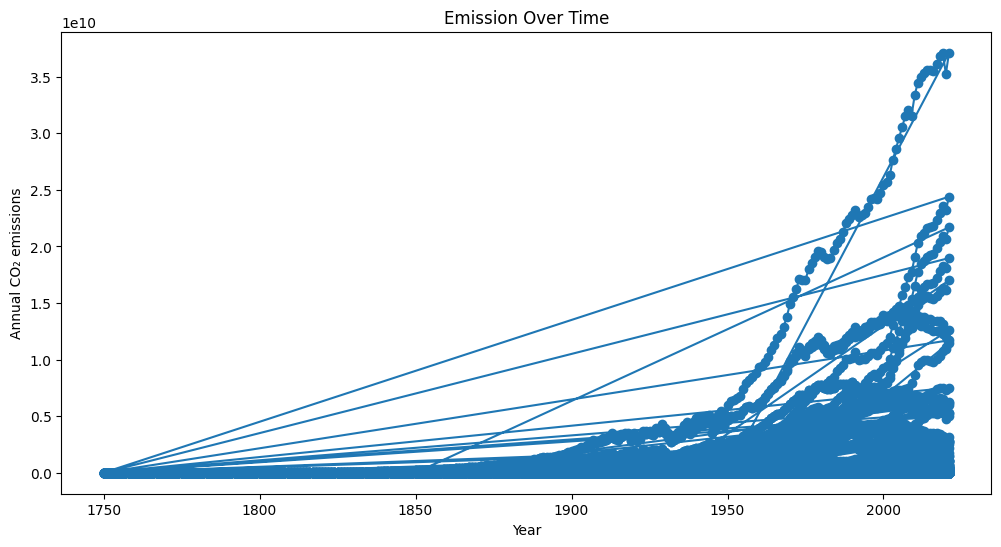

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(emission['Year'], emission['Annual CO₂ emissions'], marker='o', linestyle='-')
plt.title('Emission Over Time')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ emissions')
plt.show()


# Plot Graph for Emission levels

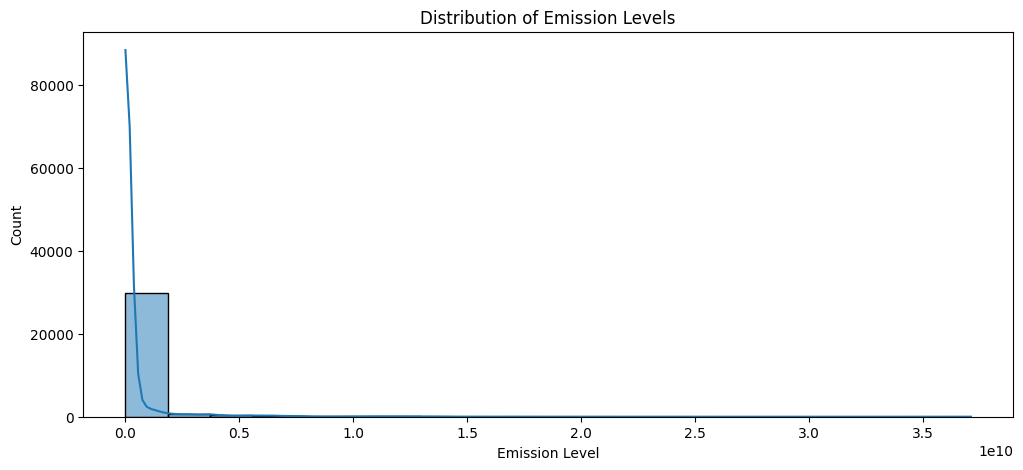

In [9]:
plt.figure(figsize=(12, 5))
sns.histplot(emission['Annual CO₂ emissions'],bins=20,  kde=True)
plt.title('Distribution of Emission Levels')
plt.xlabel('Emission Level')
plt.show()


# Pair plot for Emission over year & place

In [10]:
print(emission.columns)


Index(['country_x', 'Code', 'Year', 'Annual CO₂ emissions'], dtype='object')


<Figure size 1200x800 with 0 Axes>

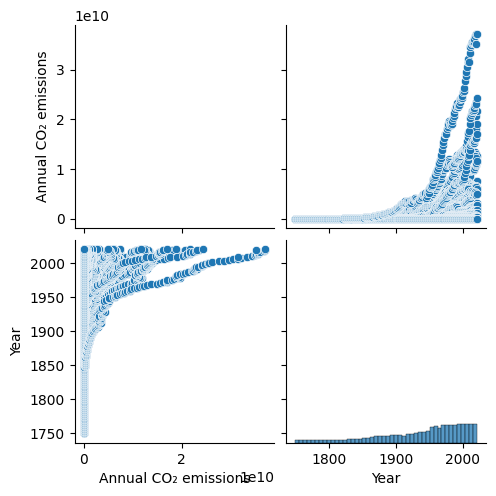

In [11]:
plt.figure(figsize=(12, 8))
sns.pairplot(emission[['Annual CO₂ emissions', 'Code', 'Year']])
plt.show()


# Heatmap to find correlation

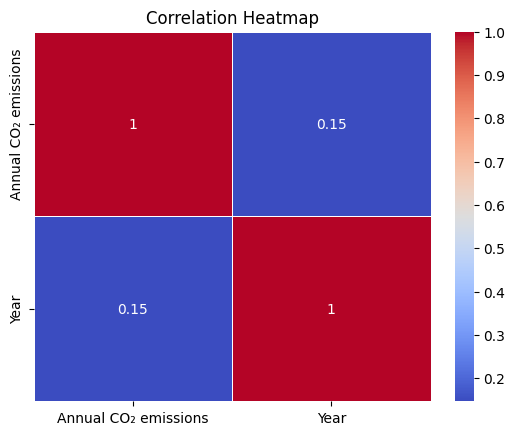

In [12]:
correlation_matrix = emission[['Annual CO₂ emissions', 'Year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


# SVM Annual Co2 Emission prediction

Mean Squared Error: 4.1726485136813164e+18


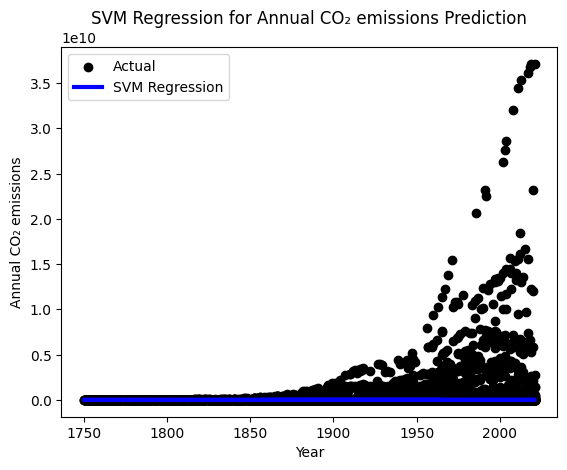

In [13]:
X = emission[['Year']]
y = emission['Annual CO₂ emissions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM regression model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the results
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='SVM Regression')
plt.title('SVM Regression for Annual CO₂ emissions Prediction')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ emissions')
plt.legend()
plt.show()

# XG Boost Mean Squared Error

In [14]:
X = emission[['Code', 'Year']]
y = emission['Annual CO₂ emissions']

# One-hot encode the 'Code' column
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X[['Code']]), columns=encoder.get_feature_names_out(['Code']))

# Concatenate the one-hot encoded features with the 'Year' column
X_encoded['Year'] = X['Year'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Mean Squared Error:", mse_xgb)

XGBoost Mean Squared Error: 1.1684656982770916e+16


# Hyperparameter

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create the XGBoost regressor
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Perform grid search
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create and train the XGBoost model with the best parameters
best_model_xgb = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
best_model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_xgb = best_model_xgb.predict(X_test)

# Calculate Mean Squared Error
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
print("Best XGBoost Mean Squared Error:", mse_best_xgb)


Best XGBoost Mean Squared Error: 1.2086341130088608e+16


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)


Random Forest Mean Squared Error: 4105920973525348.5
